In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.spatial.distance import cdist

import sys
sys.path.append('..')

import analysis.math_funcs as mf
import analysis.plotting as pl
import modules.iterable_funcs as itf
import modules.numpy_funcs as nf
import modules.pose_estimation as pe

In [2]:
%matplotlib inline

In [3]:
def score_func(a, b):
    """Score function for scoring links between body parts."""
    x = 1 / mf.norm_ratio(a, b)
    return -(x - 1)**2 + 1

part_connections = np.array([[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [3, 5],
                             [1, 3]])

lengths = np.array([69.34934639, 21.99911   , 16.76578427, 24.62445352, 23.36290419])

part_types = ['Head', 'Hip', 'Thigh', 'Knee', 'Calf', 'Foot']

### Load variables

In [4]:
load_dir = os.path.join('..', 'data', 'saved_variables')

population = np.load(os.path.join(load_dir, 'population.npy'))
labels = np.load(os.path.join(load_dir, 'labels.npy'))
paths = np.load(os.path.join(load_dir, 'path_matrix.npy'))

### Add noisy foot

In [5]:
population = np.vstack([population, [-20, -20, 300]])
labels = np.append(labels, max(labels))
 
path_extra = np.append(paths[-1, :-1], len(labels) - 1)
paths = np.vstack([paths, path_extra])

### Customize font

In [6]:
plt.rc('text', usetex=True)

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)  # pass in the font dict as kwargs

### Plot population

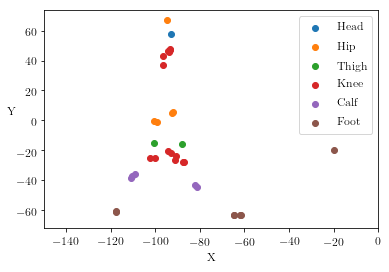

In [7]:
fig = plt.figure()

pl.scatter_labels(population, labels)

plt.legend(part_types)
plt.xlim((-150, 0))
plt.xlabel('X')
plt.ylabel('Y', rotation=0)

plt.show()

In [8]:
# fig.savefig('labelled_points.pdf', format='pdf', dpi=1200)

### Show score matrix links

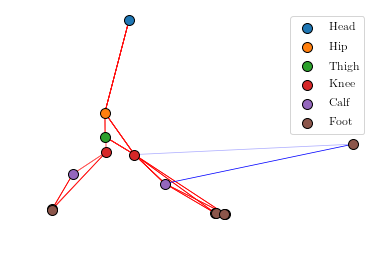

In [9]:
label_adj_list = pe.lengths_to_adj_list(part_connections, lengths)

path_nums = np.unique(paths)
pop_reduced, paths_reduced = pe.reduce_population(population, paths)
dist_matrix = cdist(pop_reduced, pop_reduced)

score_matrix = pe.get_scores(dist_matrix, paths_reduced, label_adj_list, score_func)

pl.scatter_labels(pop_reduced, labels[path_nums], s=100, edgecolors='k', zorder=5)
plt.legend(part_types)

for path in paths_reduced:
    for u in label_adj_list:
        for v in label_adj_list[u]:
            a, b = path[u], path[v]
            
            point_a, point_b = pop_reduced[a], pop_reduced[b]
            score = score_matrix[a, b]
            
            # Plot line coloured by score
            pl.connect_points(point_a, point_b, c=cm.bwr(score), linestyle='-', linewidth=0.75)
            
# plt.xlim((-150, 0))
plt.axis('off')
plt.show()

In [10]:
fig.savefig('score_matrix.png', format='png')

### Plot spheres

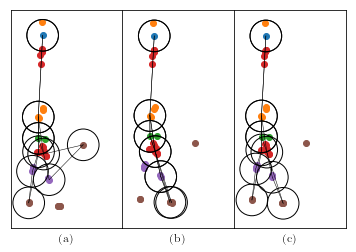

In [11]:
def plot_spheres(path_matrix):
    
    pl.scatter_labels(population, labels)
    
    for path in path_matrix:
        pl.scatter2(population[path, :], s=1e3, facecolors='none', edgecolors='k')
        

def plot_links(label_adj_list, path_matrix):
    
    for path in path_matrix:
        for u in label_adj_list:
            for v in label_adj_list[u]:
                a, b = path[u], path[v]
                point_a, point_b = population[a], population[b]
                pl.connect_points(point_a, point_b, c='k', linewidth=0.5)

                
fig = plt.figure()

ax1 = plt.subplot(1, 3, 1)
path_matrix_1 = paths[[-1, 2], :]
plot_spheres(path_matrix_1)
plot_links(label_adj_list, path_matrix_1)

ax2 = plt.subplot(1, 3, 2)
path_matrix_2 = paths[[1, 3], :]
plot_spheres(path_matrix_2)
plot_links(label_adj_list, path_matrix_2)

ax3 = plt.subplot(1, 3, 3)
path_matrix_3 = paths[[1, 2], :]
plot_spheres(path_matrix_3)
plot_links(label_adj_list, path_matrix_3)

ax1.set_xlabel('(a)')
ax2.set_xlabel('(b)')
ax3.set_xlabel('(c)')

ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax3.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

ax1.tick_params(axis='y', which='both', left=False, labelleft=False)
ax2.tick_params(axis='y', which='both', left=False, labelleft=False)
ax3.tick_params(axis='y', which='both', left=False, labelleft=False)

ax1.set_xlim([-150, 50])
ax2.set_xlim([-150, 50])
ax3.set_xlim([-150, 50])

plt.subplots_adjust(wspace=0, hspace=0)

plt.show()